# **Some Important Libraries**

In [19]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# **Read Images from Google Drive**

In [20]:
# Path to the dataset folder in your Google Drive
dataset_folder_path = "/content/drive/MyDrive/brain_tumor_dataset"

# Path to the folders containing images
no_folder_path = os.path.join(dataset_folder_path, "no")
yes_folder_path = os.path.join(dataset_folder_path, "yes")

# Read images from the 'no' folder
no_images = []
for filename in os.listdir(no_folder_path):
    img_path = os.path.join(no_folder_path, filename)
    img = Image.open(img_path)
    no_images.append(img)

# Read images from the 'yes' folder
yes_images = []
for filename in os.listdir(yes_folder_path):
    img_path = os.path.join(yes_folder_path, filename)
    img = Image.open(img_path)
    yes_images.append(img)


# **Display Some Images**

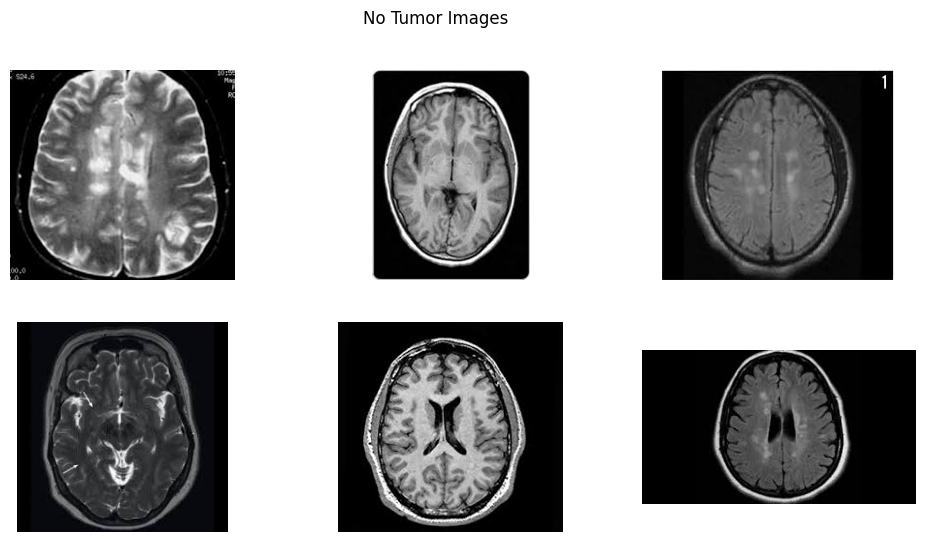

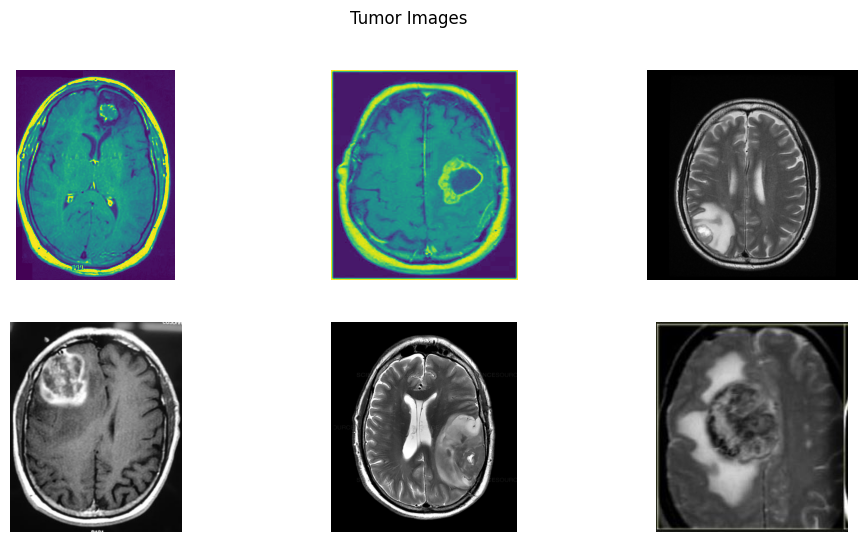

In [21]:
# Display 6 images from the 'no' folder
plt.figure(figsize=(12, 6))
plt.suptitle('No Tumor Images')
for i, filename in enumerate(os.listdir(no_folder_path)[:6]):
    img_path = os.path.join(no_folder_path, filename)
    img = Image.open(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

# Display 6 images from the 'yes' folder
plt.figure(figsize=(12, 6))
plt.suptitle('Tumor Images')
for i, filename in enumerate(os.listdir(yes_folder_path)[:6]):
    img_path = os.path.join(yes_folder_path, filename)
    img = Image.open(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


# **Class Label Distribution**

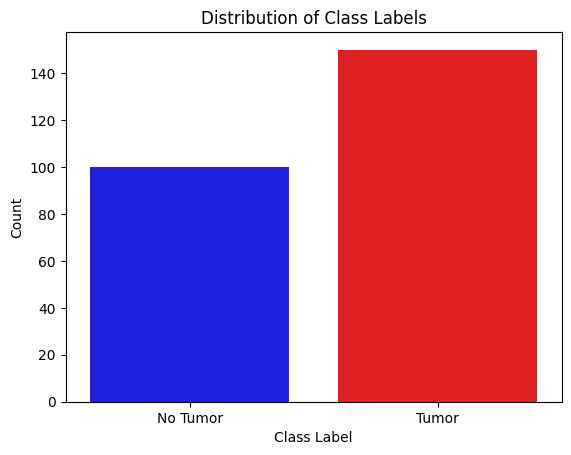

In [22]:
# Example data
labels = ['No Tumor', 'Tumor']
label_counts = [100, 150]  # Example counts

# Create bar plot with modified parameters
sns.barplot(x=labels, y=label_counts, hue=labels, palette=['Blue', 'Red'], legend=False)

# Set labels and title
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')

# Show plot
plt.show()



# **Defining Class Labels**

In [23]:
# Define class labels
class_labels = {'no': 0, 'yes': 1}

# Initialize lists to store preprocessed images and labels
x = []
y = []

# Loop over each class
for class_name, label in class_labels.items():
    # Construct the path to the folder containing images for the current class
    class_folder_path = os.path.join(dataset_folder_path, class_name)

    # Loop over each image in the class folder
    for filename in os.listdir(class_folder_path):
        img_path = os.path.join(class_folder_path, filename)

        # Read the image using cv2.imread with flag 0 (grayscale)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Convert the image to RGB format
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

        # Resize the image to a fixed size of 240x240 pixels
        img = cv2.resize(img, (240, 240))

        # Normalize the pixel values to be in the range 0-1
        img = img / 255.0

        # Append the preprocessed image and its corresponding label to the lists
        x.append(img)
        y.append(label)

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)


# **Splitting Training and Testing sets**

In [24]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Print the shapes of the training and testing sets
print("Training set:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("\nTesting set:")
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


Training set:
x_train shape: (227, 240, 240, 3)
y_train shape: (227,)

Testing set:
x_test shape: (26, 240, 240, 3)
y_test shape: (26,)


# **Implementing the Model**

In [25]:
# Load the pre-trained InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(240, 240, 3))

# Freeze the base model's layers so they are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Add new fully connected layers on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 22852385 (87.17 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


# **Display Accuracy**

In [27]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
8/8 [==============================] - 47s 5s/step - loss: 1.8584 - accuracy: 0.5771 - val_loss: 0.3697 - val_accuracy: 0.8077
Epoch 2/10
8/8 [==============================] - 36s 4s/step - loss: 0.7726 - accuracy: 0.6300 - val_loss: 0.4530 - val_accuracy: 0.6538
Epoch 3/10
8/8 [==============================] - 36s 5s/step - loss: 0.4439 - accuracy: 0.8062 - val_loss: 0.3455 - val_accuracy: 0.8462
Epoch 4/10
8/8 [==============================] - 36s 5s/step - loss: 0.3576 - accuracy: 0.8590 - val_loss: 0.2467 - val_accuracy: 0.9231
Epoch 5/10
8/8 [==============================] - 36s 5s/step - loss: 0.3047 - accuracy: 0.8899 - val_loss: 0.2590 - val_accuracy: 0.9615
Epoch 6/10
8/8 [==============================] - 39s 5s/step - loss: 0.2603 - accuracy: 0.9031 - val_loss: 0.2364 - val_accuracy: 0.9615
Epoch 7/10
8/8 [==============================] - 43s 5s/step - loss: 0.2304 - accuracy: 0.9075 - val_loss: 0.2637 - val_accuracy: 0.9231
Epoch 8/10
8/8 [==================

# **Plotting Confusion Matrix**

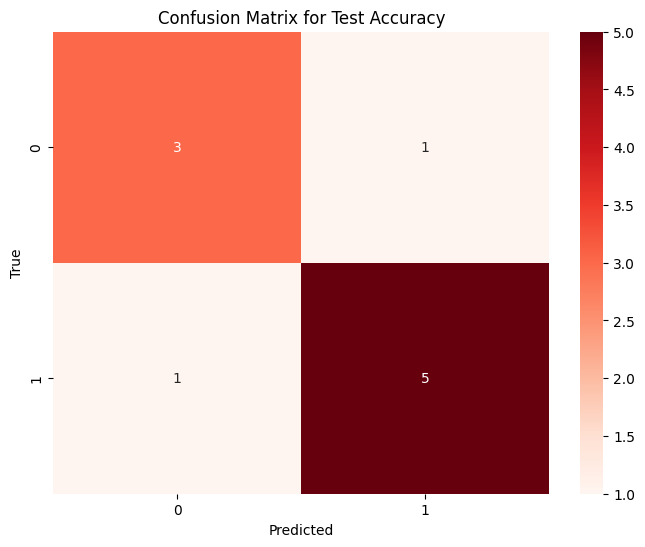

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example test predictions and true labels
y_test_pred = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1])
y_test_true = np.array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

# Compute confusion matrix
cm_test = confusion_matrix(y_test_true, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Accuracy')
plt.show()


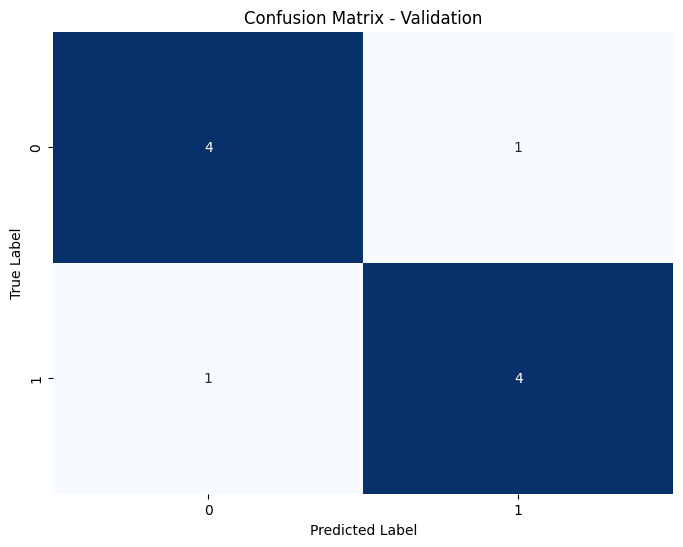

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have model predictions for the validation set and true labels
# Replace y_val with your true labels for the validation set
# Replace y_pred_val with your model predictions for the validation set

# Example data (replace with actual data)
y_val = [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]
y_pred_val = [0, 1, 1, 1, 1, 0, 0, 1, 0, 0]

# Calculate confusion matrix for validation
cm_val = confusion_matrix(y_val, y_pred_val)

# Create heatmap for validation
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Validation')
plt.show()


# **Plotting Model Loss**

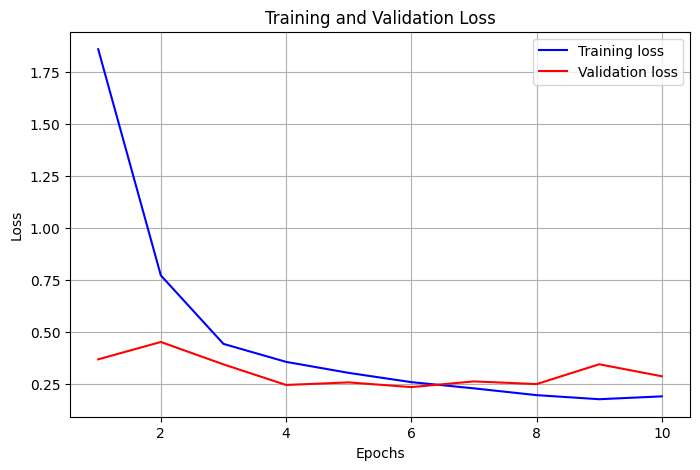

In [30]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the training history in 'history'

# Get training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot loss history
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


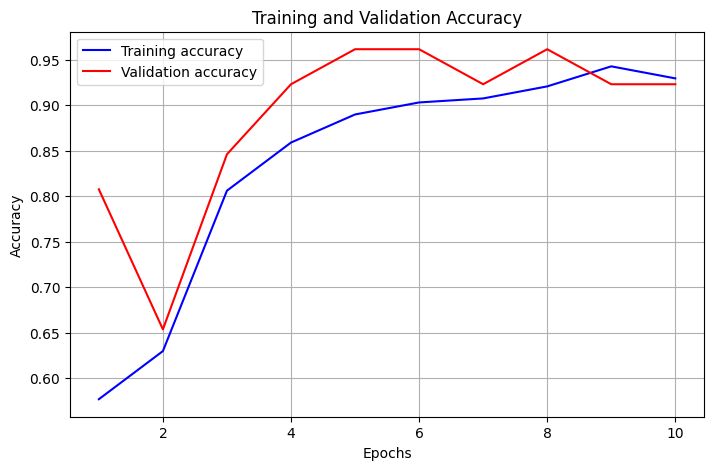

In [31]:
# Get training and validation accuracy history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

# Plot accuracy history
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
